# Light

Создайте модель для распознавания рукописных цифр из набора MNIST (можно воспользоваться ноутбуком 1-го занятия) и проведите ряд тестов:
1. Запустите сеть с различными размерами обучающей и проверочной выборок:
    * Обучающая выборка 50.000 примеров
    * Обучающая выборка 10.000 примеров
    * Обучающая выборка 500 примеров
2. Создайте еще два варианта сети и сравните значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке. Сделайте сравнительную таблицу.
4. Создайте сеть следующей архитектуры:
    * 4 Dense слоя
    * 3 Dropout слоя
    * 3 BatchNormalization слоя
    
Напишите свои выводы по результатам проведенных тестов.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

x_train = x_train_org.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train/255

x_test = x_test_org.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test/255

y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
def model_training(x_train_new, y_train_new):
  model = Sequential([
      Dense(256, input_dim=784, activation="relu"),
      Dense(10, activation="softmax")
  ])
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(x_train_new, y_train_new, batch_size=128, epochs=15, verbose=1)

  final_loss = history.history["loss"][-1]
  final_accuracy = history.history["accuracy"][-1]
  print(history.history["accuracy"][-1])

  test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

  results = {
      "final_train_loss": final_loss,
      "final_train_accuracy": final_accuracy,
      "test_loss": test_loss,
      "test_accuracy": test_accuracy
  }

  return results

In [ ]:
train_count_arr = [50000, 10000, 500]

train_acc_table = pd.DataFrame(columns=train_count_arr)
train_loss_table = pd.DataFrame(columns=train_count_arr)
test_acc_table  = pd.DataFrame(columns=train_count_arr)

for train_count in train_count_arr:
  x_train_new = x_train[:train_count]
  y_train_new = y_train[:train_count]
  train_results = model_training(x_train_new, y_train_new)

  train_loss_table.loc[train_count] = train_results["final_train_loss"]
  train_acc_table.loc[train_count] = train_results["final_train_accuracy"]
  test_acc_table.loc[train_count] = train_results["test_accuracy"]

train_acc_table = train_acc_table.astype(float)
train_loss_table = train_loss_table.astype(float)
test_acc_table  = test_acc_table.astype(float)

# Вывод
print("Final Train Accuracy")
display(train_acc_table)
print("\nFinal Train Loss")
display(train_loss_table)
print("\nFinal Test Accuracy")
display(test_acc_table)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8407 - loss: 0.5712
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9525 - loss: 0.1634
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9700 - loss: 0.1044
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9767 - loss: 0.0793
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9851 - loss: 0.0567
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9885 - loss: 0.0428
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9910 - loss: 0.0345
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9932 - loss: 0.0276
Epoch 9/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9943 - loss: 0.0241
Epoch 10/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9955 - loss: 0.0182
Epoch 11/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9975 - loss: 0.0131
Epoch 12/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7m

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6830 - loss: 1.1112
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9189 - loss: 0.2954
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9385 - loss: 0.2252
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9450 - loss: 0.1942
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9568 - loss: 0.1572
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9695 - loss: 0.1232
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9718 - loss: 0.1082
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9812 - loss: 0.0850
Epoch 9/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9802 - loss: 0.0752
Epoch 10/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9840 - loss: 0.0623
Epoch 11/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9869 - loss: 0.0528
Epoch 12/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9922 - loss: 0.0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2883 - loss: 2.1705 
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7611 - loss: 1.4751
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8242 - loss: 1.0343
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8594 - loss: 0.7276
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8776 - loss: 0.5603
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8987 - loss: 0.4186
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9075 - loss: 0.3670
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9382 - loss: 0.2956
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9351 - loss: 0.2591
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9503 - loss: 0.2048
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9645 - loss: 0.1848
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9729 - loss: 0.1638
Epoch 13/15

,50000,10000,500
50000,0.99896,0.99896,0.99896
10000,0.99570,0.99570,0.99570
500,0.99000,0.99000,0.99000



Final Train Loss


,50000,10000,500
50000,0.006690,0.006690,0.006690
10000,0.027315,0.027315,0.027315
500,0.110124,0.110124,0.110124



Final Test Accuracy


,50000,10000,500
50000,0.9812,0.9812,0.9812
10000,0.9527,0.9527,0.9527
500,0.8438,0.8438,0.8438


In [ ]:
model_advanced = Sequential([
    Dense(256, input_dim=784, activation="relu"),
    BatchNormalization(),
    Dropout(0.1),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.1),
    Dense(10, activation="softmax")
])

model_advanced.summary()

model_advanced.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_advanced.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,554 (955.29 KB)

 Trainable params: 243,658 (951.79 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8437 - loss: 0.5192
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9622 - loss: 0.1249
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9738 - loss: 0.0853
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9776 - loss: 0.0705
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9820 - loss: 0.0590
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9842 - loss: 0.0489
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9846 - loss: 0.0476
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9880 - loss: 0.0368
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9879 - loss: 0.0368
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9900 - loss: 0.0319
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9905 - loss: 0.0286
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━

# Pro

## Вариант 1

Повысьте точность модели по обнаружению мин до 90 % на тестовой выборке. Можно использовать различные варианты слоев Dropout и BatchNormalization. Можно менять количество примеров в обучающей и проверочной выборках, но нельзя менять количество примеров в тестовой.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Assets/lab5/sonar.csv', sep=',')
dataset = df.values
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
Y[Y=='R']='0'
Y[Y=='M']='1'
Y = Y.astype(int)
print(X.shape)
print(Y.shape)

(207, 60)
(207,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(165, 60)
(42, 60)
(165,)
(42,)


In [ ]:
model = Sequential([
    Dense(128, input_dim=60, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=8, epochs=25, validation_split=0.2, verbose=1)
model.fit(x_train, y_train, batch_size=8, epochs=25, validation_split=0.2, verbose=1)

Epoch 1/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5773 - loss: 0.7121 - val_accuracy: 0.7273 - val_loss: 0.6603
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7759 - loss: 0.5188 - val_accuracy: 0.7273 - val_loss: 0.6374
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7440 - loss: 0.5132 - val_accuracy: 0.7576 - val_loss: 0.6310
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8607 - loss: 0.4042 - val_accuracy: 0.7576 - val_loss: 0.6133
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8775 - loss: 0.3580 - val_accuracy: 0.7576 - val_loss: 0.5926
Epoch 6/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8942 - loss: 0.2789 - val_accuracy: 0.7576 - val_loss: 0.5786
Epoch 7/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8446 - loss: 0.3145 - val_accuracy: 0.7879 - val_loss: 0.5633
Epoch 8/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8685 - loss: 0.3527 - val_accuracy: 0.8182 - val_loss

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

print(scores)
print("Доля верных ответов на тестовых данных: ", round(scores[1] * 100, 2), "%", sep="")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8001 - loss: 0.5932
[0.5891019105911255, 0.8095238208770752]
Доля верных ответов на тестовых данных: 80.95%


## Вариант 2

По подготовленным на занятии данным создайте обучающую, тестовую и проверочную выборки.

По сформированным данным необходимо обучить модель для предсказания цены машины. Оцените качество работы созданной сети, определив средний процент ошибки на проверочной выборке. (Для этого потребуется привести предсказанные моделью значения к первоначальному диапазону цен. Это можно сделать с помощью следующего метода: predict_inverse = y_scaler.inverse_transfrom(predict).flatten() где predict - результат предсказания модели).

Затем подсчитайте ошибку на каждом примере тестовой выборки и суммарный процент ошибки.

Суммарный процент ошибки = средний модуль ошибки (MAE) / среднюю цену машины Например, если средняя цена машины 560.000р, а средняя ошибка 56.000р, то процент ошибки равен 10%

Рекомендации: в качестве ошибки рекомендуется использовать среднеквадратическую ошибку (mse) - в качестве loss для обучения сети, но не в качестве метрики, по которой мы оцениваем процент ошибки, там надо использовать средний модуль ошибки (mae); метрику для данной задачи можно не использовать; последний слой модели должен иметь 1 нейрон и активационную функцию linear или relu.

In [ ]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
from google.colab import files # Импорт файлов
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
cars = pd.read_csv('/content/drive/MyDrive/Assets/lab5/cars_new.csv', sep=',')
cars = cars.dropna()
cars.head(10)

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0
5,hyundai,creta 1 поколение,985000,2016,34067,кроссовер,автомат,бензин,2.0,150.0
6,kia,ceed 2 поколение,589000,2013,98000,хетчбэк,автомат,бензин,1.6,129.0
7,toyota,corolla e140,500000,2008,141000,седан,автомат,бензин,1.6,124.0
8,mercedes-benz,c-класс 180 w204/s204/c204 [рестайлинг],1320000,2015,81112,седан,автомат,бензин,1.6,156.0
9,bmw,7 серия 735 e65/e66,270000,2001,300000,седан,автомат,бензин,3.6,272.0


In [ ]:
def labelsToOneHot(column): #Функция для преобразования столбца данных из pandas DataFrame в OneHot
  vocab, indexes = np.unique(cars[column], return_inverse=True) #Получаем массив уникальных значений для столбца и тот же слобец, но в виде индексов
  oneHotData = utils.to_categorical(indexes.reshape(-1, 1), num_classes = len(vocab)) #Преобразуем индексы в one-hot
  return oneHotData, vocab.tolist() #Вернем индексы в one-hot и список уникальных значений

In [ ]:
labelData = ['mark', 'model', 'body', 'kpp', 'fuel']
vocabulary = []
oneHot = []
for column in labelData:
  oneHotData, vocab = labelsToOneHot(column)
  vocabulary.append(vocab)
  oneHot.append(oneHotData)
  oneHotArray = np.concatenate([i for i in oneHot], axis = 1)

['audi' 'bmw' 'chery' 'chevrolet' 'daewoo' 'ford' 'honda' 'hyundai' 'kia'
 'mazda' 'mercedes-benz' 'mitsubishi' 'nissan' 'opel' 'peugeot' 'renault'
 'skoda' 'subaru' 'suzuki' 'toyota' 'volkswagen']
[ 8  4 18 ...  9 19  3]
['1 серия' '1 серия 116' '1 серия 116 e81/e82/e87/e88 [рестайлинг]' ...
 'zafira tourer family [рестайлинг]' 'zephyr' 'zoe 1 поколение']
[ 850 2102 1733 ... 1106  633 2862]
['внедорожник' 'кабриолет' 'кроссовер' 'купе' 'лимузин' 'лифтбэк'
 'микроавтобус' 'минивэн' 'пикап' 'родстер' 'седан' 'тарга' 'универсал'
 'фастбэк' 'хардтоп' 'хетчбэк']
[10 10  0 ...  2  7  0]
['автомат' 'вариатор' 'механика' 'робот']
[0 2 0 ... 0 0 0]
['бензин' 'газ' 'гибрид' 'дизель' 'электро']
[0 0 0 ... 0 0 0]


In [ ]:
for voc in vocabulary:
  print('Число уникальных элементов в', labelData[vocabulary.index(voc)], ':', len(voc))

Число уникальных элементов в mark : 21
Число уникальных элементов в model : 3156
Число уникальных элементов в body : 16
Число уникальных элементов в kpp : 4
Число уникальных элементов в fuel : 5


In [ ]:
prices = np.array(cars['price'], dtype='float32')
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [ ]:
x_train = []
y_train = []

for _id, car in enumerate(np.array(cars)):
  y_train.append(prices[_id])

  x_tr = oneHotArray[_id]
  x_tr = np.append(x_tr, years[_id])
  x_tr = np.append(x_tr, mileages[_id])
  x_tr = np.append(x_tr, volumes[_id])
  x_tr = np.append(x_tr, powers[_id])

  x_train.append(x_tr)

x_train = np.array(x_train, dtype='float32')
y_train = np.array(y_train, dtype='float32')

In [ ]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x_train, y_train_scaled, test_size=0.1, shuffle=True)
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.2, shuffle=True)

In [ ]:
model = Sequential([
    Dense(64, input_dim=xTrain.shape[1], activation='relu'),
    Dropout(0.1),
    Dense(128, activation='tanh'),
    Dropout(0.1),
    Dense(1, activation='linear')
])

model.compile(loss='mse', optimizer=Adam(0.01), metrics=['mae'])

In [ ]:
history = model.fit(xTrain, yTrain, batch_size=2048, epochs=30, validation_data = (xVal, yVal), verbose=1)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.5550 - mae: 0.3649 - val_loss: 0.2197 - val_mae: 0.1937
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.1918 - mae: 0.1772 - val_loss: 0.1698 - val_mae: 0.1383
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.1141 - mae: 0.1389 - val_loss: 0.1584 - val_mae: 0.1275
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0995 - mae: 0.1363 - val_loss: 0.1365 - val_mae: 0.1217
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0865 - mae: 0.1315 - val_loss: 0.1379 - val_mae: 0.1235
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0726 - mae: 0.1273 - val_loss: 0.1258 - val_mae: 0.1238
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0767 - mae: 0.1345 - val_loss: 0.1509 - val_mae: 0.1431
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0810 - mae: 0.1357 - val_loss: 0.1457 - val_mae: 0.1372
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.

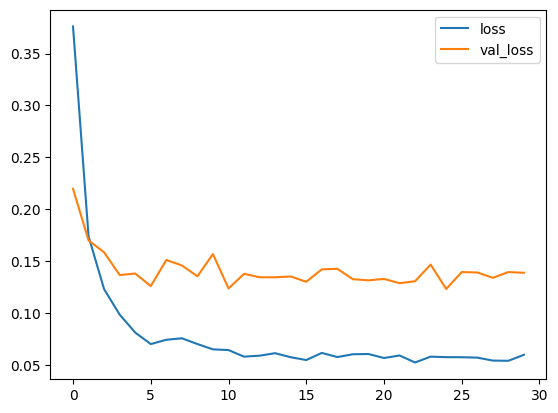

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(xTest, yTest, verbose=1)

print("MSE on test data:", scores[0])

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0844 - mae: 0.1225
MSE on test data: 0.09758760780096054
